# FHE Basics


## Einführung

Veranschaulichung was FHE kann:

- Encode
- Encrypt
- Decrypt
- Decode

Basisoperationen:
- Addition
- Multiplikation
- Rotation

## Step 1. Importiere pyhelayers library

In [93]:
import pyhelayers
import utils 
utils.verify_memory()
# Print the ciphertext content for demo purposes
pyhelayers.get_print_options().print_encrypted_content=True 
print("Imported pyhelayers", pyhelayers.VERSION)

Imported pyhelayers 1.5.3.0


<br>

## Step 2. Initialisiere kryptografische Parameter


In [94]:
requirement = pyhelayers.HeConfigRequirement(
    num_slots = 8192, # Number of slots per ciphertext
    multiplication_depth = 2, # Allow 2 levels of multiplications
    fractional_part_precision = 40, # Set the precision to 1/2^40.
    integer_part_precision = 20, # Set the largest number to 2^20.
    security_level = 128)

he_context = pyhelayers.DefaultContext()
he_context.init(requirement)

<br>

## Step 3. Perform basic Homomorphic Encryption operations

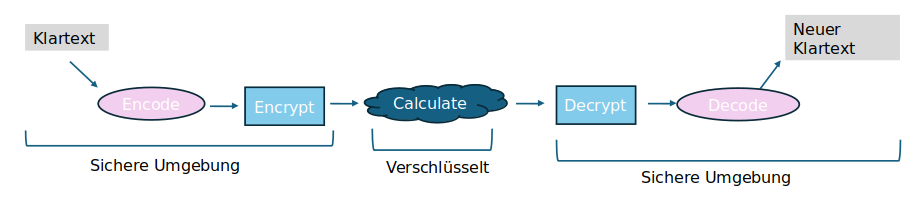

> X + Y =~ decode( decrypt( encrypt( encode(X)) + encrypt(encode(Y)) ) )

## Encoding, decoding, encrypting and decrypting
Bsp: CKKS

### Encoding(Klartextvektor) --> Polynom 
    - nur andere Repräsentation
    - Encodings gleicher Klartexte sind identisch (deterministisch)
    - Encoding fügt schon enormen Overhead hinzu

In [95]:
# Create the Encoder using the context.
encoder = pyhelayers.Encoder(he_context)

# Encode a vector.
v1 = [1.0, 2.0, 3.0]
encode_v1_1 = encoder.encode(v1)
encode_v1_2 = encoder.encode(v1)

print(
      f'1. Encoding: {encode_v1_1} \n'
      f'2. Encoding: {encode_v1_2} \n'
     )

print(f'Typ von Klartext: {type(v1)} \n'
      f'Länge des Klartextes: {len(v1)} \n')

print(f'Typ von Encoding: {type(encode_v1_1)} \n'
      f'Länge des Encodings: {encode_v1_1.slot_count()}\n \n'
      f'--> Das Encoding ist viel länger als der Klartext - großer Overhead')

1. Encoding: PTile CI=2, logscale=40 , bit usage=41.585, max value=3
(1,-4.75e-17) (2,1.11e-18) (3,-1.19e-16) (2.42e-11,4.24e-18) ...  (3.96e-11,-2.7e-18)
 
2. Encoding: PTile CI=2, logscale=40 , bit usage=41.585, max value=3
(1,-4.75e-17) (2,1.11e-18) (3,-1.19e-16) (2.42e-11,4.24e-18) ...  (3.96e-11,-2.7e-18)
 

Typ von Klartext: <class 'list'> 
Länge des Klartextes: 3 

Typ von Encoding: <class 'pyhelayers.PTile'> 
Länge des Encodings: 8192
 
--> Das Encoding ist viel länger als der Klartext - großer Overhead


### Encrypt(Encoding) --> Paar von Polynomen 
    - Sicherheit kommt hier her
    - jeder Geheimtext sieht anders aus (fügt noise hinzu)

In [96]:
c1_1 = encoder.encode_encrypt(v1)
c1_2 = encoder.encode_encrypt(v1)

print(f'1. Encryption: {c1_1} \n'
      f'2. Encryption: {c1_2} \n'
     )

print(f'Typ von Encryption: {type(c1_1)} \n'
      f'Länge der Verschlüsselung: {c1_1.slot_count()}')

1. Encryption: CIPHERTEXT [[401194850812544062,246199715928363149,873392962888362861,303320821507985813 ...  561333735053] ] 
2. Encryption: CIPHERTEXT [[489538165844220532,463342427698327179,554388311354503641,320291268586579768 ...  1036802743471] ] 

Typ von Encryption: <class 'pyhelayers.CTile'> 
Länge der Verschlüsselung: 8192


### Decrypt(ciphertext) --> Encoding 
    - geht nur mit secret key (Passwort)
    - die Dechiffrierung ist korrekt
    - die Dechiffrierung hat einen Overhead
    - die Dechiffrierung ist approximativ
    

In [97]:
d1 = encoder.decrypt_decode_double(c1_1)
d2 = encoder.decrypt_decode_double(c1_2)
print(f'1. Decryption: {d1} \n'
      f'2. Decryption: {d2} \n'
     )

print(f'Typ der Dechiffrierung: {type(d1)} \n'
      f'Länge der Dechiffrierung: {len(d1)} \n')

print(f'Vergleich Klartext vs. Dechiffrierung \n'
      f'Klartext:       {v1} \n'
      f'Dechiffrierung: {d1[0:3]} \n'
      f'Rest des Vektors: {d1[3:6]}\n')

1. Decryption: [ 1.00000000e+00  2.00000000e+00  3.00000000e+00 ...  5.21545069e-10
 -1.84760743e-09  2.33396647e-09] 
2. Decryption: [9.99999998e-01 2.00000000e+00 3.00000000e+00 ... 1.25539893e-09
 1.07089322e-09 4.40623563e-09] 

Typ der Dechiffrierung: <class 'numpy.ndarray'> 
Länge der Dechiffrierung: 8192 

Vergleich Klartext vs. Dechiffrierung 
Klartext:       [1.0, 2.0, 3.0] 
Dechiffrierung: [1. 2. 3.] 
Rest des Vektors: [ 4.72797834e-10 -8.24477427e-10  2.13525074e-09]



### Zusammenfassung zu Encoding, Encryption, Decoding, Decryption

In [98]:
print('Initial vector:   {}'.format(v1))
print('Encoded vector:   {}'.format(encode_v1_1))
print('Encrypted vector: {}'.format(c1_1))
print('Decoded vector:   {}'.format(d1[:3]))

Initial vector:   [1.0, 2.0, 3.0]
Encoded vector:   PTile CI=2, logscale=40 , bit usage=41.585, max value=3
(1,-4.75e-17) (2,1.11e-18) (3,-1.19e-16) (2.42e-11,4.24e-18) ...  (3.96e-11,-2.7e-18)

Encrypted vector: CIPHERTEXT [[401194850812544062,246199715928363149,873392962888362861,303320821507985813 ...  561333735053] ]
Decoded vector:   [1. 2. 3.]


## Rechnen auf verschlüsselten Daten

### Addition/ Subtraktion
Addieren mittels `.add()` Methode auf dem ersten `CTile`:

In [99]:
plain_1 = [1, 2, 3]
plain_2 = [4, 5, 6.5]

cipher_1 = encoder.encode_encrypt(plain_1)
cipher_2 = encoder.encode_encrypt(plain_2)

# !!! Wir addieren auf verschlüsselten Daten!!!
cipher_1.add(cipher_2)
print('Result Addition:    {}'.format(encoder.decrypt_decode_double(cipher_1)[:3]))

# analog mit subtraktion
plain_3 = [1, 2, 3]
plain_4 = [-4, -3, -6.5]

cipher_3 = encoder.encode_encrypt(plain_3)
cipher_4 = encoder.encode_encrypt(plain_4)

# !!! Wir subtrahieren auf verschlüsselten Daten!!!
cipher_3.add(cipher_4)
print('Result Subtraktion: {}'.format(encoder.decrypt_decode_double(cipher_3)[:3]))


Result Addition:    [5.  7.  9.5]
Result Subtraktion: [-3.         -1.00000001 -3.5       ]


### Multiplikation/ Division
Addieren mittels `.multiply()` Methode auf dem ersten `CTile`:

In [100]:
plain_1 = [1, 2, 3]
plain_2 = [4, 5, -6.5]

cipher_1 = encoder.encode_encrypt(plain_1)
cipher_2 = encoder.encode_encrypt(plain_2)

# !!! Wir multiplizieren auf verschlüsselten Daten!!!
cipher_1.multiply(cipher_2)
print('Result Multiplikation:    {}'.format(encoder.decrypt_decode_double(cipher_1)[:3]))

# analog mit Division
plain_3 = [1, 2, 3]
plain_4 = [1/2, 1/3, -1/5]

cipher_3 = encoder.encode_encrypt(plain_3)
cipher_4 = encoder.encode_encrypt(plain_4)

# !!! Wir dividieren auf verschlüsselten Daten!!!
cipher_3.multiply(cipher_4)
print('Result Division: {}'.format(encoder.decrypt_decode_double(cipher_3)[:3]))

Result Multiplikation:    [  4.   10.  -19.5]
Result Division: [ 0.5         0.66666667 -0.6       ]


### Rotation

Rotieren mittels `.rotate()` Methode auf dem ersten `CTile`:

In [101]:
m = [1, 2, 3]
c = encoder.encode_encrypt(plain_1)

c.rotate(-1)
print('Result Rotation: {}'.format(encoder.decrypt_decode_double(c)[:3]))

Result Rotation: [-2.14762027e-06  9.99999996e-01  2.00000005e+00]


## Durchschnitt berechnen

Man kann auch komplizierte Funktionen zusammenbauen

In [103]:
v1 = [1.0, 5.0, 13.0]
c1 = encoder.encode_encrypt(v1)

v2 = [2.0, 6.0, 18.0]
c2 = encoder.encode_encrypt(v2)

v3 = [3.0, 1.0, 20.0]
c3 = encoder.encode_encrypt(v3)

c1.add(c2) 
c1.add(c3)
c1.multiply_scalar(1/3)

print('Result: {}'.format(encoder.decrypt_decode_double(c1)[:3]))

Result: [ 2.  4. 17.]
